In [34]:
import scipy.stats
!pip install ucimlrepo
!pip install scipy
!pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.1 MB 13.0 MB/s eta 0:00:01
   ---------------- ----------------------- 4.5/11.1 MB 12.5 MB/s eta 0:00:01
   ----------------- ---------------------- 5.0/11.1 MB 9.1 MB/s eta 0:00:01
   -------------------- ------------------- 5.8/11.1 MB 7.0 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.1 MB 6.3 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.1 MB 5.7 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.1 MB 5.1 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 4.7 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 4.3 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.1 MB 4.1 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.1 MB 4.1 MB/s eta 0:00:01
   ---------------

In [35]:
from ucimlrepo import fetch_ucirepo
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
from sklearn.preprocessing import MinMaxScaler

In [4]:
iranian_churn = fetch_ucirepo(id=563)

In [5]:
from imprimirMeta import imprimir_metadatos

In [6]:
df = iranian_churn.data.features
imprimir_metadatos(iranian_churn.metadata)
iranian_churn.variables

Nombre                                        Valor                                                                           
uci_id                                        563                                                                             
name                                          Iranian Churn                                                                   
repository_url                                https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset                   
data_url                                      https://archive.ics.uci.edu/static/public/563/data.csv                          
abstract                                      This dataset is randomly collected from an Iranian telecom company's database over a period of 12 months.
area                                          Business                                                                        
tasks                                         Classification, Regression              

name     role        type demographic description  \
0             Call  Failure  Feature     Integer        None        None   
1                 Complains  Feature      Binary        None        None   
2      Subscription  Length  Feature     Integer        None        None   
3            Charge  Amount  Feature     Integer        None        None   
4            Seconds of Use  Feature     Integer        None        None   
5          Frequency of use  Feature     Integer        None        None   
6          Frequency of SMS  Feature     Integer        None        None   
7   Distinct Called Numbers  Feature     Integer        None        None   
8                 Age Group  Feature     Integer         Age        None   
9               Tariff Plan  Feature     Integer        None        None   
10                   Status  Feature      Binary        None        None   
11                      Age  Feature     Integer         Age        None   
12           Customer Value  Feature  Continuous        None        None   
13                    Churn   Target      Binary        None        None   

   units missing_values  
0   None             no  
1   None             no  
2   None             no  
3   None             no  
4   None             no  
5   None             no  
6   None             no  
7   None             no  
8   None             no  
9   None             no  
10  None             no  
11  None             no  
12  None             no  
13  None             no

In [ ]:
print(df.info())

In [13]:

df.describe()

Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3150.000000  3150.000000           3150.000000     3150.000000   
mean        7.627937     0.076508             32.541905        0.942857   
std         7.263886     0.265851              8.573482        1.521072   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             30.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.000000   
25%       1391.250000         27.000000          6.000000   
50%       2990.000000         54.000000         21.000000   
75%       6478.250000         95.000000         87.000000   
max      17090.000000        255.000000        522.000000   

       Distinct Called Numbers    Age Group  Tariff Plan       Status  \
count              3150.000000  3150.000000  3150.000000  3150.000000   
mean                 23.509841     2.826032     1.077778     1.248254   
std                  17.217337     0.892555     0.267864     0.432069   
min                   0.000000     1.000000     1.000000     1.000000   
25%                  10.000000     2.000000     1.000000     1.000000   
50%                  21.000000     3.000000     1.000000     1.000000   
75%                  34.000000     3.000000     1.000000     1.000000   
max                  97.000000     5.000000     2.000000     2.000000   

               Age  Customer Value  
count  3150.000000     3150.000000  
mean     30.998413      470.972916  
std       8.831095      517.015433  
min      15.000000        0.000000  
25%      25.000000      113.801250  
50%      30.000000      228.480000  
75%      30.000000      788.388750  
max      55.000000     2165.280000

In [8]:
df.tail()

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
3145             21          0                    19               2   
3146             17          0                    17               1   
3147             13          0                    18               4   
3148              7          0                    11               2   
3149              8          1                    11               2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
3145            6697               147                92   
3146            9237               177                80   
3147            3157                51                38   
3148            4695                46               222   
3149            1792                25                 7   

      Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
3145                       44          2            2       1   25   
3146                       42          5            1       1   55   
3147                       21          3            1       1   30   
3148                       12          3            1       1   30   
3149                        9          3            1       1   30   

      Customer Value  
3145          721.98  
3146          261.21  
3147          280.32  
3148         1077.64  
3149          100.68

In [27]:
df.duplicated().sum()

np.int64(314)

In [30]:
df_sin_duplicados = df.drop_duplicates()
df_sin_duplicados.duplicated().sum()

np.int64(0)

In [38]:
scaler = MinMaxScaler()
scaler.fit(df)
pd_normalizado = pd.DataFrame(scaler.transform(df))
pd_normalizado.describe()

0            1            2            3            4   \
count  3150.000000  3150.000000  3150.000000  3150.000000  3150.000000   
mean      0.211887     0.076508     0.671407     0.094286     0.261700   
std       0.201775     0.265851     0.194852     0.152107     0.245635   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.027778     0.000000     0.613636     0.000000     0.081407   
50%       0.166667     0.000000     0.727273     0.000000     0.174956   
75%       0.333333     0.000000     0.795455     0.100000     0.379067   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                5            6            7            8            9   \
count  3150.000000  3150.000000  3150.000000  3150.000000  3150.000000   
mean      0.272395     0.140182     0.242369     0.456508     0.077778   
std       0.225150     0.215014     0.177498     0.223139     0.267864   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.105882     0.011494     0.103093     0.250000     0.000000   
50%       0.211765     0.040230     0.216495     0.500000     0.000000   
75%       0.372549     0.166667     0.350515     0.500000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                10           11           12  
count  3150.000000  3150.000000  3150.000000  
mean      0.248254     0.399960     0.217511  
std       0.432069     0.220777     0.238775  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.250000     0.052557  
50%       0.000000     0.375000     0.105520  
75%       0.000000     0.375000     0.364105  
max       1.000000     1.000000     1.000000

In [39]:
from sklearn.decomposition import PCA
modelo = PCA(n_components=0.95)
modelo.fit(df)
modelo.transform(df)

array([[ -116.63871503],
       [-4171.57475373],
       [-1960.77359453],
       ...,
       [-1323.78213344],
       [  253.6771821 ],
       [-2696.58393138]], shape=(3150, 1))

(array([ 123.,    0., 1037., 1425.,    0.,    0.,    0.,  395.,    0.,
         170.]),
 array([15., 19., 23., 27., 31., 35., 39., 43., 47., 51., 55.]),
 <BarContainer object of 10 artists>)

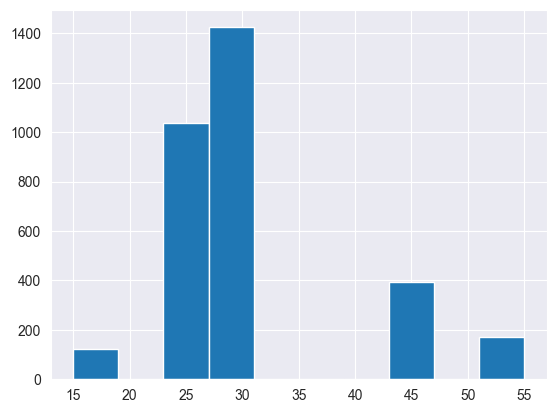

In [31]:
plt.hist(df['Age'])

In [19]:
valores_quejas = df['Complains'].value_counts()
valores_quejas

Complains
0    2909
1     241
Name: count, dtype: int64

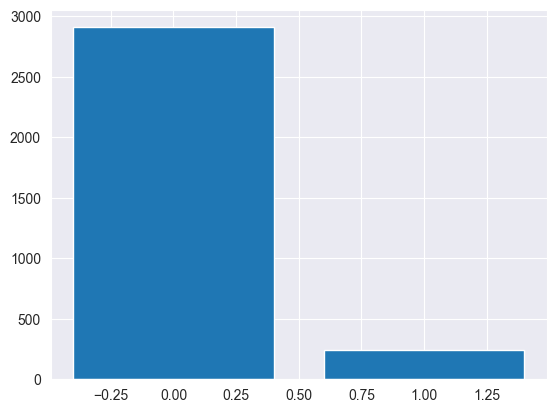

In [22]:
plt.bar(valores_quejas.index, valores_quejas)
plt.show()

([<matplotlib.patches.Wedge at 0x217650d5be0>,
 [Text(-1.0683784641383163, 0.261853885526743, '0'),
  Text(1.0683784245994674, -0.26185404684739993, '1')])

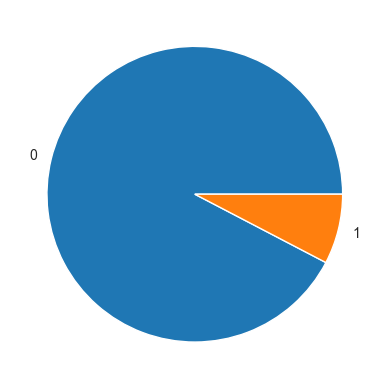

In [20]:
plt.pie(valores_quejas,labels=valores_quejas.index)

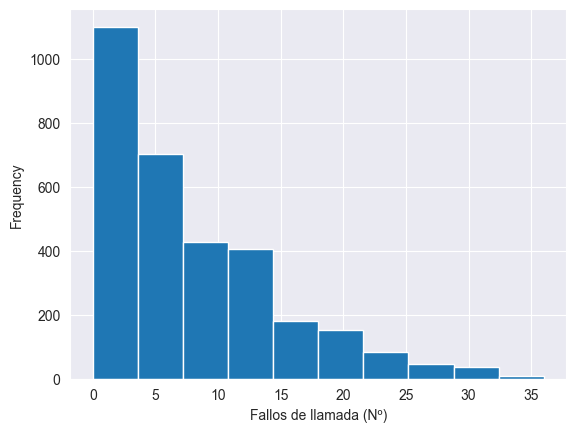

In [16]:
plt.hist(df['Call  Failure'])
plt.xlabel('Fallos de llamada (Nº)')
plt.ylabel('Frequency')
plt.show()

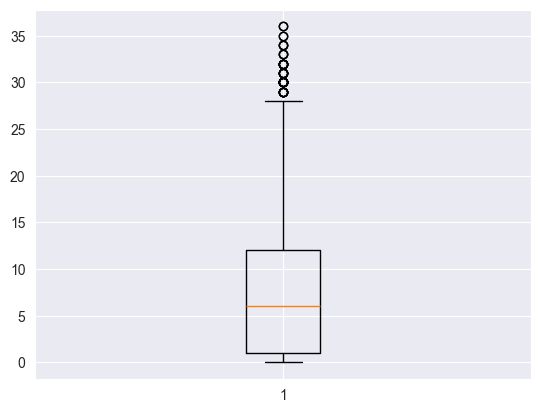

In [17]:
plt.boxplot(df['Call  Failure'])
plt.show()

In [14]:
#voy a comprobar cuantos tipos de valores distintos toma age
df['Age Group'].value_counts()

Age Group
3    1425
2    1037
4     395
5     170
1     123
Name: count, dtype: int64

In [10]:
df.shape

(3150, 13)

In [12]:
df.corr()

Call  Failure  Complains  Subscription  Length  \
Call  Failure                 1.000000   0.152879              0.169737   
Complains                     0.152879   1.000000             -0.020286   
Subscription  Length          0.169737  -0.020286              1.000000   
Charge  Amount                0.589028  -0.033948              0.078789   
Seconds of Use                0.501607  -0.104952              0.124618   
Frequency of use              0.573349  -0.090774              0.106534   
Frequency of SMS             -0.022282  -0.111633              0.076318   
Distinct Called Numbers       0.504058  -0.058199              0.092009   
Age Group                     0.050406   0.019976              0.021453   
Tariff Plan                   0.192285   0.001140             -0.159680   
Status                       -0.114645   0.271405              0.142841   
Age                           0.041758   0.003298             -0.002430   
Customer Value                0.121225  -0.132895              0.109565   

                         Charge  Amount  Seconds of Use  Frequency of use  \
Call  Failure                  0.589028        0.501607          0.573349   
Complains                     -0.033948       -0.104952         -0.090774   
Subscription  Length           0.078789        0.124618          0.106534   
Charge  Amount                 1.000000        0.446738          0.379096   
Seconds of Use                 0.446738        1.000000          0.946489   
Frequency of use               0.379096        0.946489          1.000000   
Frequency of SMS               0.091533        0.102123          0.100019   
Distinct Called Numbers        0.415198        0.676536          0.736114   
Age Group                      0.279679        0.020060         -0.032544   
Tariff Plan                    0.324232        0.133593          0.206452   
Status                        -0.356269       -0.460618         -0.454752   
Age                            0.278955        0.020843         -0.028350   
Customer Value                 0.169428        0.415087          0.401572   

                         Frequency of SMS  Distinct Called Numbers  Age Group  \
Call  Failure                   -0.022282                 0.504058   0.050406   
Complains                       -0.111633                -0.058199   0.019976   
Subscription  Length             0.076318                 0.092009   0.021453   
Charge  Amount                   0.091533                 0.415198   0.279679   
Seconds of Use                   0.102123                 0.676536   0.020060   
Frequency of use                 0.100019                 0.736114  -0.032544   
Frequency of SMS                 1.000000                 0.079650  -0.053719   
Distinct Called Numbers          0.079650                 1.000000   0.020941   
Age Group                       -0.053719                 0.020941   1.000000   
Tariff Plan                      0.195686                 0.172079  -0.150593   
Status                          -0.296164                -0.413039   0.002506   
Age                             -0.092798                 0.051037   0.960758   
Customer Value                   0.924877                 0.284807  -0.183481   

                         Tariff Plan    Status       Age  Customer Value  
Call  Failure               0.192285 -0.114645  0.041758        0.121225  
Complains                   0.001140  0.271405  0.003298       -0.132895  
Subscription  Length       -0.159680  0.142841 -0.002430        0.109565  
Charge  Amount              0.324232 -0.356269  0.278955        0.169428  
Seconds of Use              0.133593 -0.460618  0.020843        0.415087  
Frequency of use            0.206452 -0.454752 -0.028350        0.401572  
Frequency of SMS            0.195686 -0.296164 -0.092798        0.924877  
Distinct Called Numbers     0.172079 -0.413039  0.051037        0.284807  
Age Group                  -0.150593  0.002506  0.960758       -0.183481  
Tariff Pla

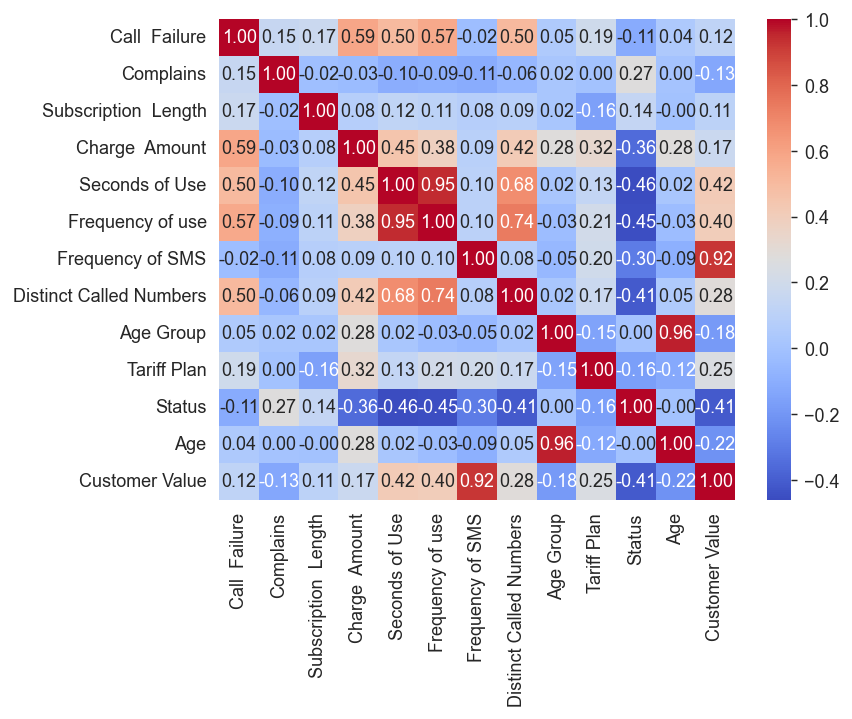

In [72]:
plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.show()

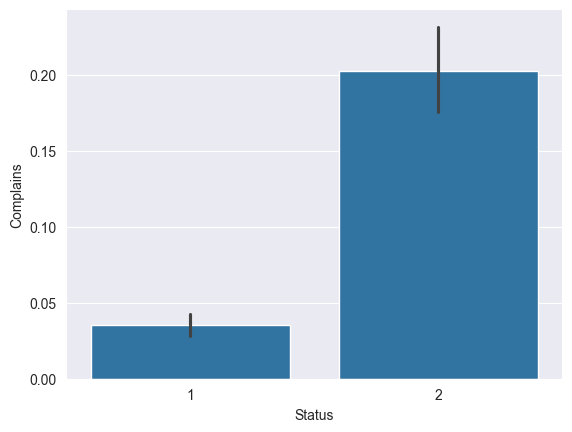

In [313]:
# fig, ax = plt.subplots()
sns.barplot(x="Status", y="Complains", data=df)
plt.show()

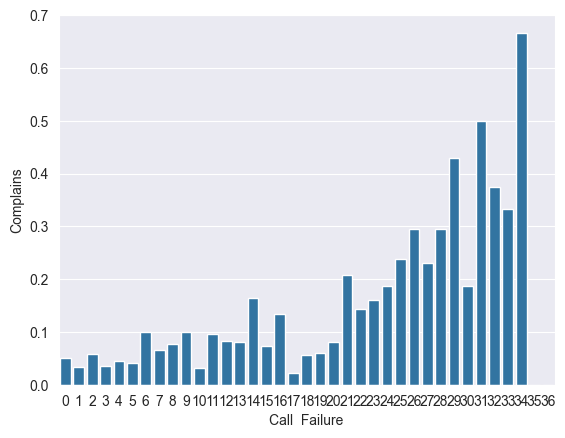

In [238]:
sns.barplot(x="Call  Failure", y="Complains", data=df, errorbar=None)
plt.show()

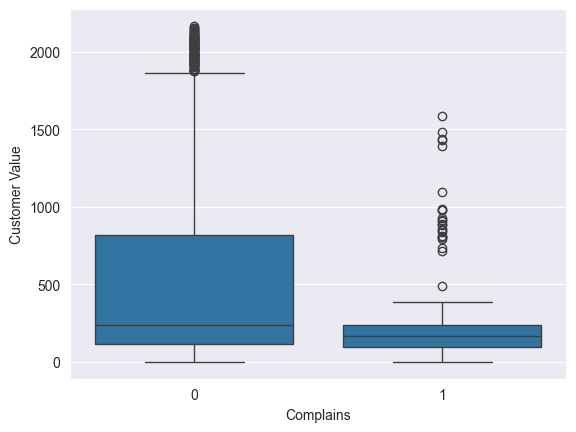

In [321]:
# q1, q3 = np.percentile(df['Complains'], [25, 75])
# iqr = q3 - q1
#
# lower_bound = q1 - (1.5 * iqr)
# upper_bound = q3 + (1.5 * iqr)
#
# datos_limpios = df[(df['Complains'] >= lower_bound) & (df['Complains'] <= upper_bound)]
sns.boxplot(y="Customer Value", x="Complains", data=df)
# plt.ylim(-0.000000000000000001,0.000000000000000001)
plt.show()


<Axes: xlabel='Age', ylabel='Complains'>

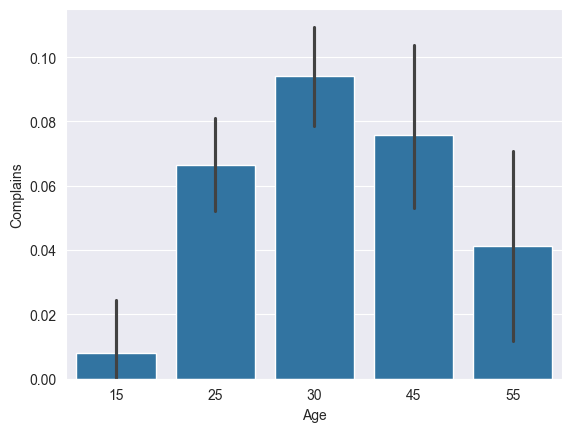

In [248]:
sns.barplot(x="Age", y="Complains", data=df)

In [214]:
from scipy.stats import spearmanr
columna_a_comparar = 'Complains'
for col in df.columns:
    print("Point-biserial: <{}> {}".format(col, sp.stats.pointbiserialr(df[columna_a_comparar], df[col])[0]))
    print("Pearson       : <{}> {}".format(col, df.corr()[columna_a_comparar][col]))
    print("Spearman      : <{}> {}".format(col,spearmanr(df[columna_a_comparar], df[col])[0]))

Point-biserial: <Call  Failure> 0.1528787513726799
Pearson       : <Call  Failure> 0.1528787513726798
Spearman      : <Call  Failure> 0.12134181026199184
Point-biserial: <Complains> 1.0
Pearson       : <Complains> 1.0
Spearman      : <Complains> 0.9999999999999999
Point-biserial: <Subscription  Length> -0.02028569331376013
Pearson       : <Subscription  Length> -0.020285693313760234
Spearman      : <Subscription  Length> -0.008790245274015713
Point-biserial: <Charge  Amount> -0.03394764958257428
Pearson       : <Charge  Amount> -0.03394764958257427
Spearman      : <Charge  Amount> -0.08499971636196677
Point-biserial: <Seconds of Use> -0.10495177866720325
Pearson       : <Seconds of Use> -0.10495177866720332
Spearman      : <Seconds of Use> -0.11940841583609493
Point-biserial: <Frequency of use> -0.09077421558092372
Pearson       : <Frequency of use> -0.09077421558092381
Spearman      : <Frequency of use> -0.0911634466567906
Point-biserial: <Frequency of SMS> -0.11163256105561017
Pearso

In [218]:
from scipy.stats import f_oneway

# Agrupar os datos por grupo de idade
grupos_idade = df.groupby('Complains')['Status'].apply(list)

# Realizar ANOVA
f_stat, p_value = f_oneway(*grupos_idade)

print(f'Estatística F: {f_stat}')
print(f'Valor p: {p_value}')

Estatística F: 250.32324672816463
Valor p: 2.5917424359700666e-54


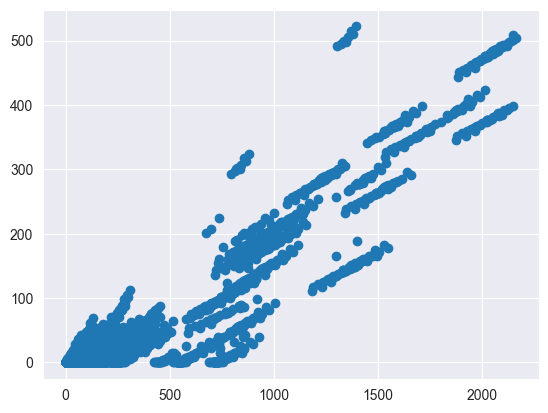

In [24]:
plt.scatter(df['Customer Value'], df['Frequency of SMS'])
plt.show()

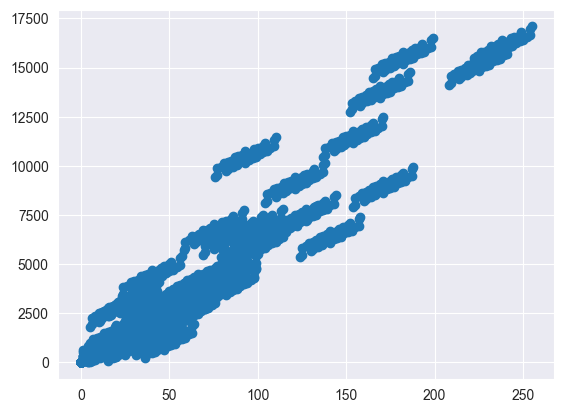

In [25]:
plt.scatter(df['Frequency of use'], df['Seconds of Use'])

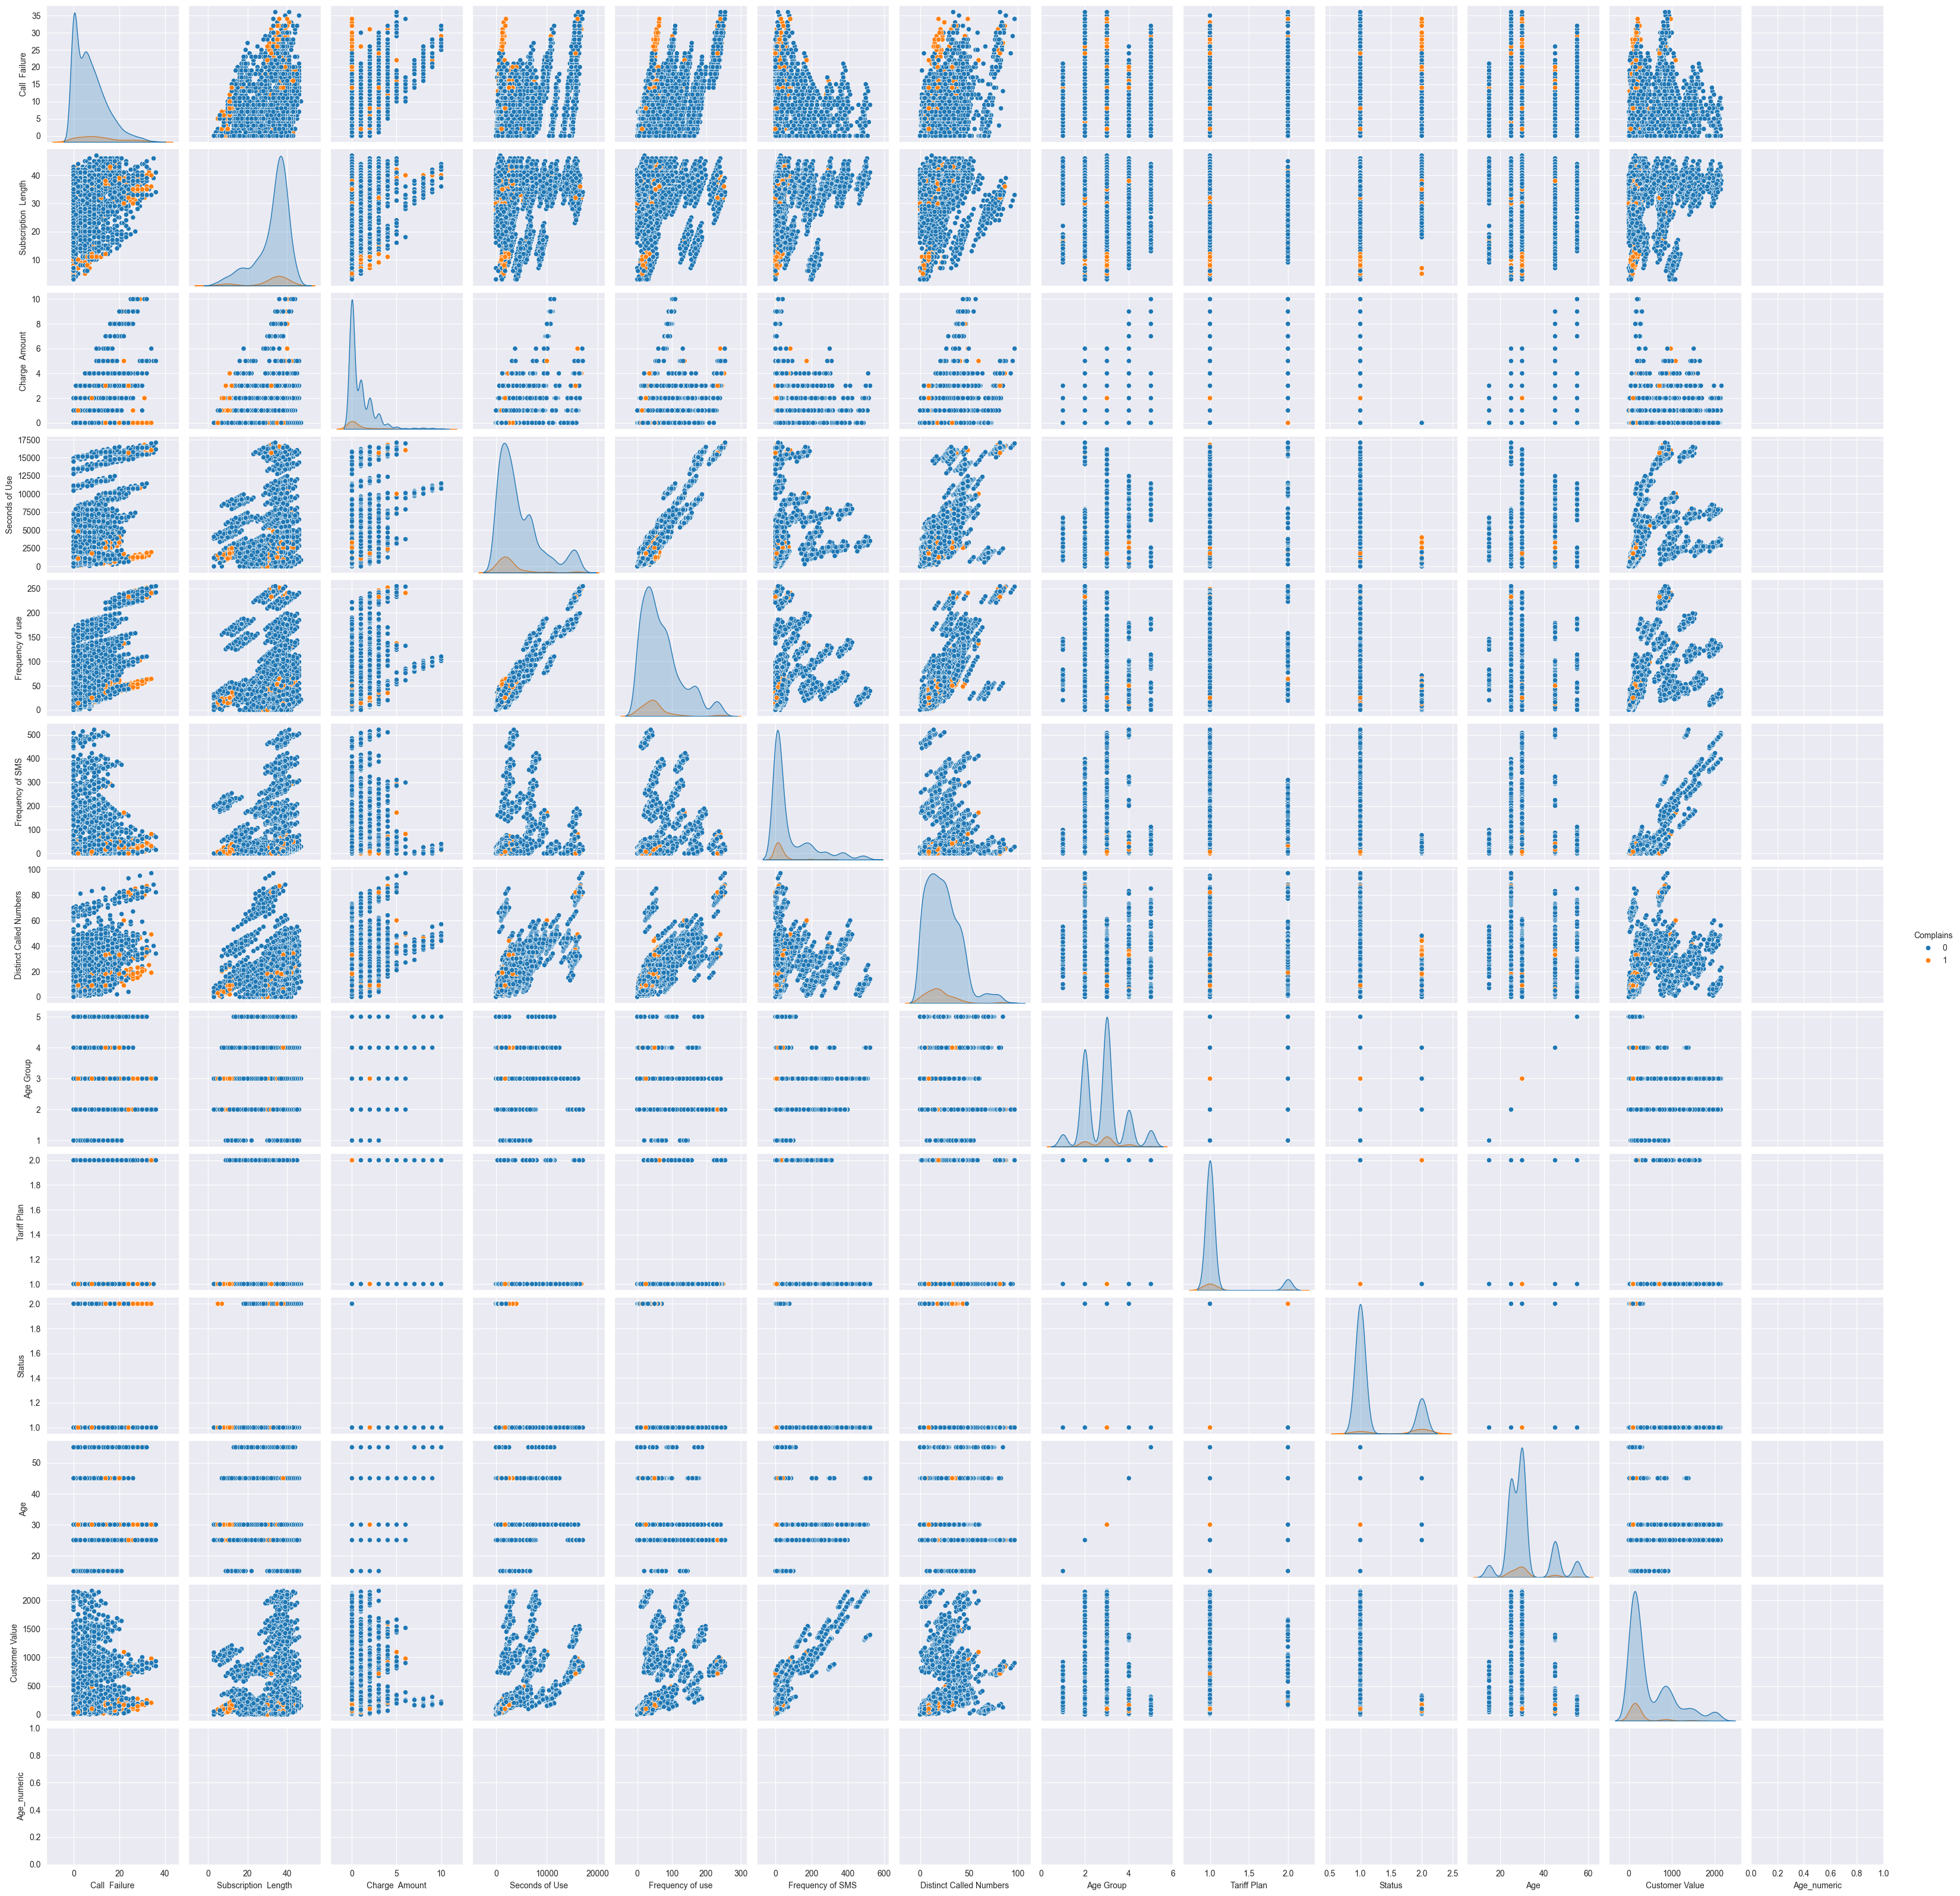

In [306]:
#multivariate
sns.pairplot(df, hue='Complains')